We will be implementing a simple logistic regression notebook here. So let's start with what is logisitic regression?
Now taking out the mathematical jargon, it is find to the weights that maximize the likelihood of producing our given data.
Since this maximizing the likelihood is an iterative process, we will be doing the optimization problem with gradient descent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)
num_observations=5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separable_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

Let's see how it looks

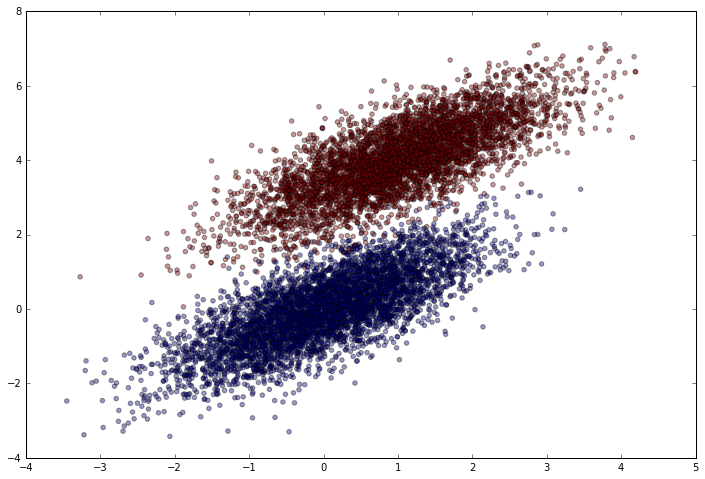

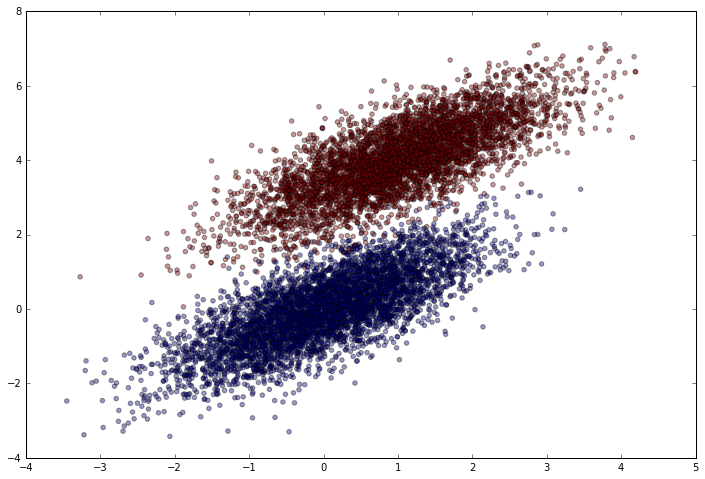

In [3]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separable_features[:, 0], simulated_separable_features[:, 1],
            c = simulated_labels, alpha = .4)
plt.show()

## Picking a Link function

We will be using the sigmoid function as the link function.

In [4]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

## Maximising and calculating the likelihood

Since log transformations are monotonic, I can reduce the likelihood without affecting weight parameter estimation
The log-likelihood can be viewed as as sum over all the training data. Mathematically,
$$\begin{equation}
ll = \sum_{i=1}^{N}y_{i}\beta ^{T}x_{i} - log(1+e^{\beta^{T}x_{i}})
\end{equation}$$
where $y$ is the target class, $x_{i}$ represents an individual data point, and $\beta$ is the weights vector.


In [5]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

## Building the logistic regression function


In [9]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with log likelihood gradient
        output_error_signal = target - predictions
        
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights

In [10]:
weights = logistic_regression(simulated_separable_features, simulated_labels,
                     num_steps = 50000, learning_rate = 5e-5, add_intercept=True)

-4346.26477915
-148.706722768
-142.964936231
-141.545303072
-141.060319659


In [11]:
print (weights)


[-13.58690551  -4.8809644    7.99812915]
